<a href="https://colab.research.google.com/github/aps1070-2019/All_Labs_Answers/blob/master/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APS1070
#### PCA - Project 3

Project 3 is structured a bit differently than Projects 1 and 2 - here, all the code for the tutorial part is given. You're encouraged to read closely, adjust and experiment to make sure you fully understand what the code is doing. Once you have a firm grasp of PCA, you should be in great shape for the exercises at the end. Note that all 12.5 marks for this project are attributed to the exercises. The tutorial is not marked.

Please fill out the following:


*   Your **name**: Jiayang Song
*   Your **student number**: 1005781708



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. Complete exercises.


## Principle Component Analysis - Introduction

### Principle Component Analysis

As you get deeper in the world of data science, you'll learn that in practice it's very uncommon to work with datasets that are 2 or 3 dimensional, and so can be plotted directly. We're now going to look at _dimensionality reduction_ : a category of unsupervised algorithms which attempt to collapse high-dimensional datasets into a low-dimensional space.

As suggested above, one reason to do this is to aid visualization. However, that's far from the only reason dimensionality reduction is useful! These techniques also allow us to filter noise, extract useful features, and accomplish much more.

Let's dive into PCA with the Iris dataset.

### PCA - Overview

1. Standardize the data.


2. Obtain the Eigenvectors and Eigenvalues from the Covariance matrix (or Correlation matrix), or perform Singular Vector Decomposition.


3. Sort eigenvalues in descending order and choose the 𝑘 eigenvectors that correspond to the 𝑘 largest eigenvalues where 𝑘 is the number of dimensions of the new feature subspace. 𝑘 is less than original dimensionality.


4. Construct the projection matrix 𝐖 from the selected 𝑘 eigenvectors.


5. Transform the original dataset 𝐗 via 𝐖 to obtain a 𝑘-dimensional feature subspace 𝐘.

## PCA - Iris dataset

What's that flower?

### Intro

For the following tutorial, we will be working with the famous "Iris" dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:
1. Iris-setosa (n=50)
1. Iris-versicolor (n=50)
1. Iris-virginica (n=50)

And the four features of in Iris dataset are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values # features
y = df.iloc[:,4].values  # label
# y.shape

In [0]:
labels = set(y)
labels # convert any of the iterable to the distinct element and sorted sequence of iterable elements

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### Exploratory Data Analysis

Let's explore a bit.

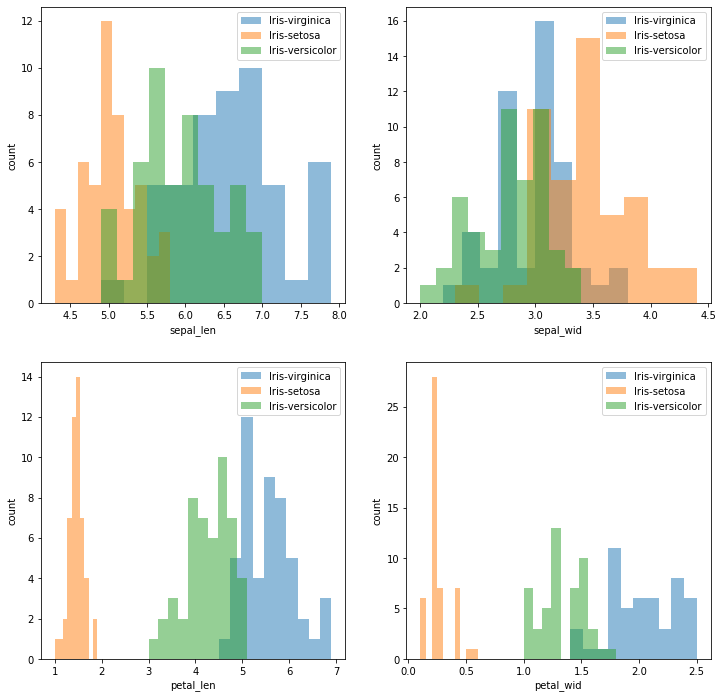

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
noOfCols = X.shape[1] # number of features

# iterate over each column (feature), and plot in separate sub-plot.
for col in range(noOfCols):
    # plot data for different labels for choosen column (feature).
    for label in labels:
        axes.flat[col].hist(X[y==label, col], alpha=0.5, label=label)
        
    axes.flat[col].legend(loc='upper right')
    axes.flat[col].set(xlabel=df.columns[col], ylabel='count')

As one can see, no feature can on it's own predict the class of the flower.

### Standardizing Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. 

Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [0]:
X_std = StandardScaler().fit_transform(X)

In [0]:
X[:, 0].mean(), X_std[:, 0].mean()

(5.843333333333334, -4.736951571734001e-16)

In [0]:
X[:, 0].var(), X_std[:, 0].var()

(0.6811222222222223, 1.0)

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

Methods to perform PCA:
1. The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a 𝑑×𝑑 matrix where each element represents the covariance between two features.
2. But, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency.

#### Using Covariance Matrix

In [0]:
n, m = X_std.shape
print('Normalized data set, shape:', X_std.shape)
# Compute covariance matrix
# C = np.dot(X_std.T, X_std) / (n-1)  # sample covariance ?
C = np.cov(X_std.T)
print('\nCovariance mareix: \n',C, '\nShape of covarianec matrix:',C.shape)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C)  # Compute the eigenvalues and eigenvectors for the covariance matrix
# One of the most intuitive explanations of eigenvectors of a covariance matrix is that they are the directions in which the data varies the most
print('\nEigenVectores:\n',eigenVectors, '\nEigenVector shape:',eigenVectors.shape)
print('\nEigenValues:', eigenValues)

Normalized data set, shape: (150, 4)

Covariance mareix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]] 
Shape of covarianec matrix: (4, 4)

EigenVectores:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 
EigenVector shape: (4, 4)

EigenValues: [2.93035378 0.92740362 0.14834223 0.02074601]


#### Using Singular Vector Decomposition

In [0]:
eigenVectors, s, v = np.linalg.svd(X_std.T)
# s: Vector(s) with the singular values
# v: Unitary array(s)
eigenVectors, eigenVectors.shape

(array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]), (4, 4))

In [0]:
n, m = X_std.shape 
# n: # of data in each feature
# m: # of features
eigenValues = s**2/(n-1)
eigenValues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

Are the eigenVectors and the eigenValues returned by both the methods the same?

#### Sort based on eigenValues

Decreasing order of eigenValues.
It was not needed in this case as eigenValues were already in decreasing order.

In [0]:
args = (-eigenValues).argsort()  
eigenValues = eigenValues[args]
print(eigenValues)
# print(eigenVectors.shape,'\n',eigenVectors)
eigenVectors = eigenVectors[:, args] # Each eignevector is a 4x1 matrix for the crossponding eigenvalue
print(eigenVectors)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


### Explained Variance

In [0]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues] # explained variance
cumExpVar = np.cumsum(expVar) # Return the cumulative sum of the elements along a given axis
print('Cumulative explained variance:',cumExpVar)

Cumulative explained variance: [ 72.77045209  95.80097536  99.48480732 100.        ]


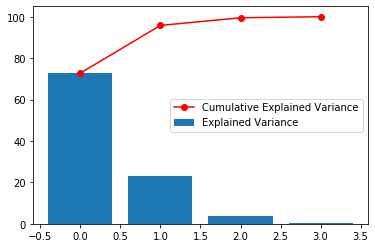

In [0]:
plt.bar(range(4), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

How many eigenValues are needed to explain more than 95% of variance?

### Projections

Since only 2 eigenVectors are enough to explain more than 95% of variance, we'll create the projection matrix using the first 2 eigenVectors.

In [0]:
COUNT = 2
W = eigenVectors[:, 0:COUNT] # take the first two eignevectors
print(W, '\n',W.shape)

[[-0.52237162 -0.37231836]
 [ 0.26335492 -0.92555649]
 [-0.58125401 -0.02109478]
 [-0.56561105 -0.06541577]] 
 (4, 2)


In [0]:
projX = np.dot(X_std, W) # forming new data set (dimension reduced to 2)
print(X_std.shape)
X.shape, projX.shape   

(150, 4)


((150, 4), (150, 2))

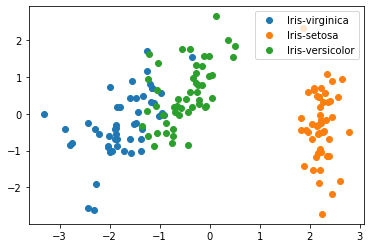

In [0]:
for label in labels:
    plt.plot(projX[y==label, 0], projX[y==label, 1], 'o', label=label)  # Plot the new data set (2 dimensions)based on the labels
                                        # We have three labels, each has two features (projX)
    plt.legend(loc='upper right')                     # Each axises in plot represnets a new feature

What has PCA helped us achieve here?

1. Visualization: easier visualization of all 3 classes
2. Classification: a flower of unknown class can be plotted here, and then classified visually or using algorithms (such as KNNs) 

We have used PCA on numerical data. But can it used on Image data?

## Eigenfaces

Let's face the Eigen.

### Intro

**Eigenfaces** is the name given to a set of **eigenvectors** when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic (as opposed to a parts-based or feature-based) manner. 

The motivation of Eigenfaces is twofold:

1. Extract the relevant facial information, which may or may not be directly related to human intuition of face features such as the eyes, nose, and lips. One way to do so is to capture the statistical variation between face images.
2. Represent face images efficiently. To reduce the computation and space complexity, each face image can be represented using a small number of parameters.

Images are downloaded from [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/).

In [0]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=0ac0dc0589eb1b2729cf967f12d86ba243274f9d8c5ee2f1066fd189aa835963
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import wget
import math

In [0]:
# Download and unzip dataset.
filename = wget.download('https://github.com/aps1070-2019/datasets/raw/master/lfw-a.tgz', 'lfw-a.tgz')
!tar -xvzf "{filename}"

lfw/Aaron_Eckhart/
lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
lfw/Aaron_Guiel/
lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg
lfw/Aaron_Patterson/
lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg
lfw/Aaron_Peirsol/
lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
lfw/Aaron_Pena/
lfw/Aaron_Pena/Aaron_Pena_0001.jpg
lfw/Aaron_Sorkin/
lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
lfw/Aaron_Tippin/
lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg
lfw/Abba_Eban/
lfw/Abba_Eban/Abba_Eban_0001.jpg
lfw/Abbas_Kiarostami/
lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
lfw/Abdel_Aziz_Al-Hakim/
lfw/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-Hakim_0001.jpg
lfw/Abdel_Madi_Shabneh/
lfw/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg
lfw/Abdel_Nasser_Assidi/
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0002.jpg
lfw/Abdoulaye_Wade/
lfw/Abdoulay

In [0]:
# constants
IMAGE_DIR = 'lfw'
DEFAULT_SIZE = [250, 250] 

In [0]:
# Reads images from filesystem and returns Array of images and imageNames.
def readImages(imagePath = IMAGE_DIR, defaultSize = DEFAULT_SIZE):
    images = []
    imageNames = []
    imageDirs = [image for image in os.listdir(imagePath) if not image.startswith('.')]

    for imageDir in imageDirs:
        dirPath = os.path.join(imagePath, imageDir)
        dirImageNames = [image for image in os.listdir(dirPath) if not image.startswith('.')]
        
        for imageName in dirImageNames:
            image = Image.open(os.path.join(dirPath, imageName))
            image = image.convert ("L") # L stands for Luminance: converts image to grayscale
            
            if (defaultSize is not None):
                image = image.resize(defaultSize, Image.ANTIALIAS) # resize image
                
            images.append(np.asarray(image, dtype = np.uint8))
            imageNames.append(imageDir)
    return [images, imageNames]

In [0]:
[X, y] = readImages()
# X is a list contains all 1054 images (size: 250x250)
# y is a list contians name of each image

In [0]:
type(X), len(X)

(list, 1054)

In [0]:
type(X[0]), X[0].shape

(numpy.ndarray, (250, 250))

In [0]:
type(y), len(y)


(list, 1054)

### Exploratory Data Analysis

Check from dataset if this image has correct label.

Image name is:  Abid_Hamid_Mahmud_Al-Tikriti


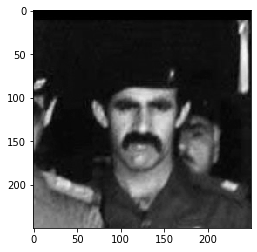

In [0]:
print('Image name is: ', y[2])
plt.imshow(X[2], cmap=plt.cm.gray)  # Set the colormap to "gray"
plt.show()


Creating a mean face from all dataset faces.

In [0]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype) # the data type is: multidimensional, homogeneous array
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1))) # np.asarry: Convert the input to an array, (1xn) one rwo array
                                            # np.vstack: Stack arrays in sequence vertically (row wise), downward
    return rowMatrix
    # This function converts each image to (1x62500) single row array, then stack all 1054 images to a new array
    # Thus, the output is a (1054 x 62500) matrix, each row represents an image (single rowed)

(1054, 62500)


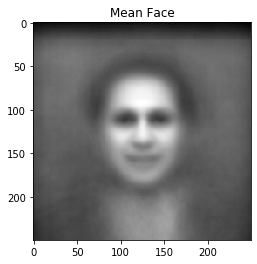

In [0]:
XMat = asRowMatrix(X);
print(XMat.shape)
meanImage = np.reshape(XMat.mean(axis=0), X[0].shape) # Take the mean on each column and compress all rows into a single row
                             # Reshape the output to a (250x250) standard size image, each value is the mean values from all 1054 images
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Using Covariance Matrix

In [0]:
def getBasisCountThatPreservesVariance(eigenValues, variance=.95):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)): # adds a counter to an iterable and returns it in a form of enumerate object
        if cumulativeSum > variance: # This function calculate the cumulative explained variance iteratively
            return idx       # and return the index(number) that how many eigenvalue we need to explain at least 95% variance
        
def pca(X, y): # Normalizing data
    n, d = X.shape
    mu = X.mean(axis=0)
    print(mu.shape)
    X = X - mu # standardising data
    
    if n > d: # in case: there are enough data in each feature 
        C = np.dot(X.T, X) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        # if we dont have enough data in each feature
        C = np.dot(X, X.T) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues) # 
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues) # get the num of eigenvalues that can represent 95% of variance 
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()        # copy the eignevalues we need 
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()     # and the crossponding eigenvectors
    return eigenValues, eigenVectors, mu

Below image explains the PCA code above:

<img src='https://github.com/aps1070-2019/datasets/raw/master/img/eig-decom.png' />

In [0]:
eigenValues, eigenVectors, mean = pca(XMat, y)

(62500,)
Number of useful eigenBasis are:  298


In [0]:
# Above code in pca method is written because below code is computationally time taking.
# C = np.dot(XMat.T, XMat) # covariance matrix
# eigenValues, eigenVectors = np.linalg.eigh(C)

#### EigenFaces

**What were dimensions of eigenVector in the case of Iris example?**

Array of size = number of features (4 in the case of Iris).
Array of size 4.

**What will be dimensions of eigenVector in this example?**

Array of size = feature size (62500). 

In [0]:
eigenVectors[:, 0].shape

(62500,)

If the dimensions of eigenVector is same as the vectorised image.

What if eigenVector is displayed in image format.

This is called **eigenFace.**

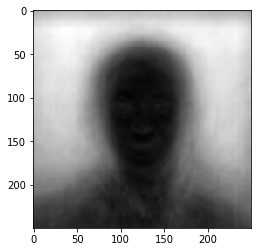

In [0]:
# show the first eigenFace
plt.imshow(eigenVectors[:, 0].reshape(-1, 250), cmap = plt.cm.gray)

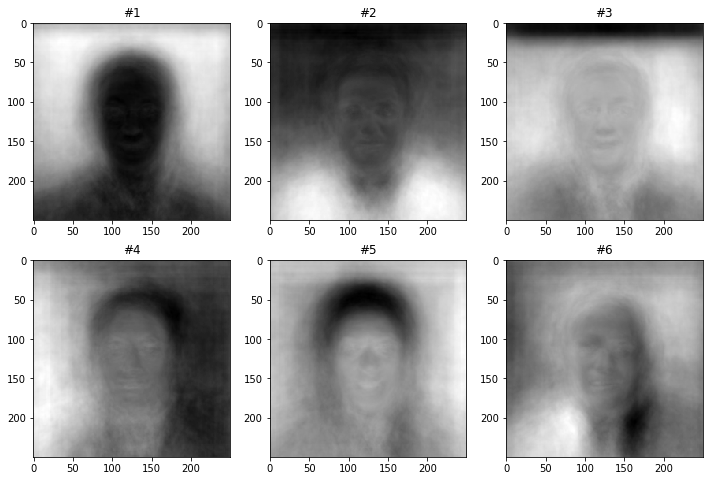

In [0]:
# print first 6 eigen faces
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

By only using first few eigenFaces:
1. How would you get a face with white hair.
2. Answer the same for black hair.

Have a good look at eigenFace number 5.

Good luck sleeping tonight.

1. **Plot the next 6 eigenFaces.**
2. **Do you observe any difference observed between the first 6 and second 6.**

### Projections

Now, we will reconstruct an image from the dataset using eigenFaces (eigenVectors).

In [0]:
IMAGE_IDX = 10 # image idx in dataset

In [0]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [0]:
# create reconstructed images
COUNT = 6 # count of first eigenVectors used to reconstruct the image
reconImages = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

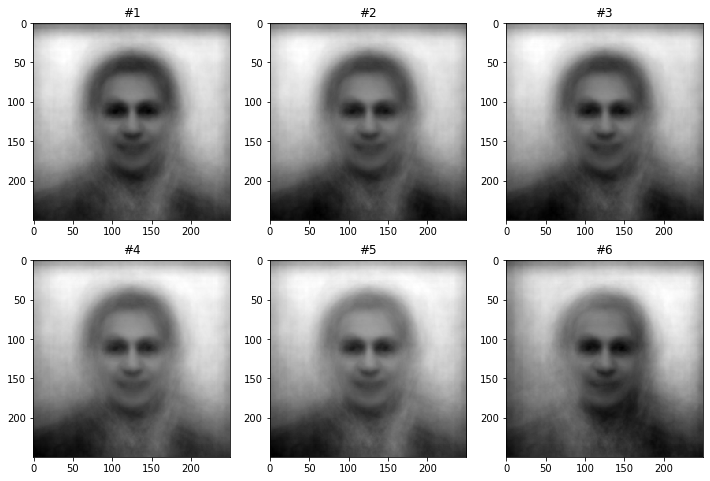

In [0]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [0]:
# create reconstructed images
numEvsSet = [100, 200, 298] # these no. of eigenVectors will be used to reconstruct the image.
COUNT = len(numEvsSet)
reconImages = []
for numEvs in numEvsSet:
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

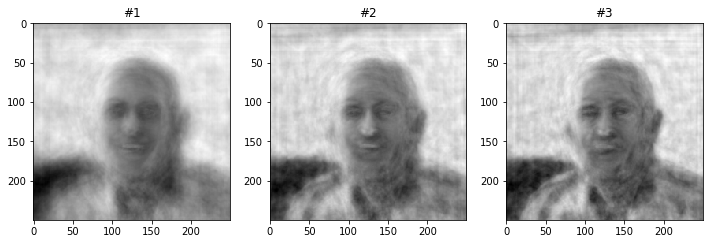

In [0]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

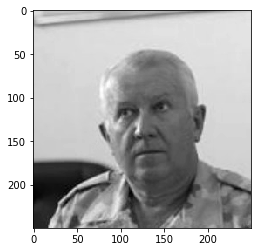

In [0]:
# actual image
plt.imshow(X[IMAGE_IDX], cmap=plt.cm.gray)
plt.show()

Can you identify the person after 298 eigenVector reconstruction?

### Facial Recognition (Optional)

**How a new point would be classified on the IRIS dataset after PCA.**

1. Projecting all training samples into the PCA subspace.
2. Projecting the query image into the PCA subspace.
3. Finding the nearest neighbor (one algorithm to accomplish this) between the projected training images and the projected query image. 

**How would a new face be classified (facial recognition) after PCA.**



**FunFact: EigenFaces is still often considered as a baseline comparison method to demonstrate the minimum expected performance of a facial recognition system.**

## Time Series Data - Exercises

The clock is ticking.

The dataset is of Tuberculosis prevalence over various countries between the given time period.

Data url: 'https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv'.

Answer the below questions.

You are free to do the below analysis over other time-series datasets of your interest (eg: financial stock data, etc.), provided the dataset has at least 15 columns (time points / features) and at least 100 rows (data points).

### Question 1

1. Display 30 random samples of the original time series data in a 10 x 3 (3 plots each in 10 rows) graph format.[1]  
2. Do you see any recurring patterns (ie oscillations, monotonic increase or decrease, other trends)?[0.5]


> The 1st principal component retains maximum variation that was present in the original components. The principal components are the eigenvectors of a covariance matrix, and hence they are orthogonal. 

> One of the most intuitive explanations of eigenvectors of a covariance matrix is that they are the directions in which the data varies the most. 

>(More precisely, the first eigenvector is the direction in which the data varies the most, the second eigenvector is the direction of greatest variance among those that are orthogonal (perpendicular) to the first eigenvector, the third eigenvector is the direction of greatest variance among those orthogonal to the first two, and so on.)



In [0]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import pandas as pd
import io
import requests

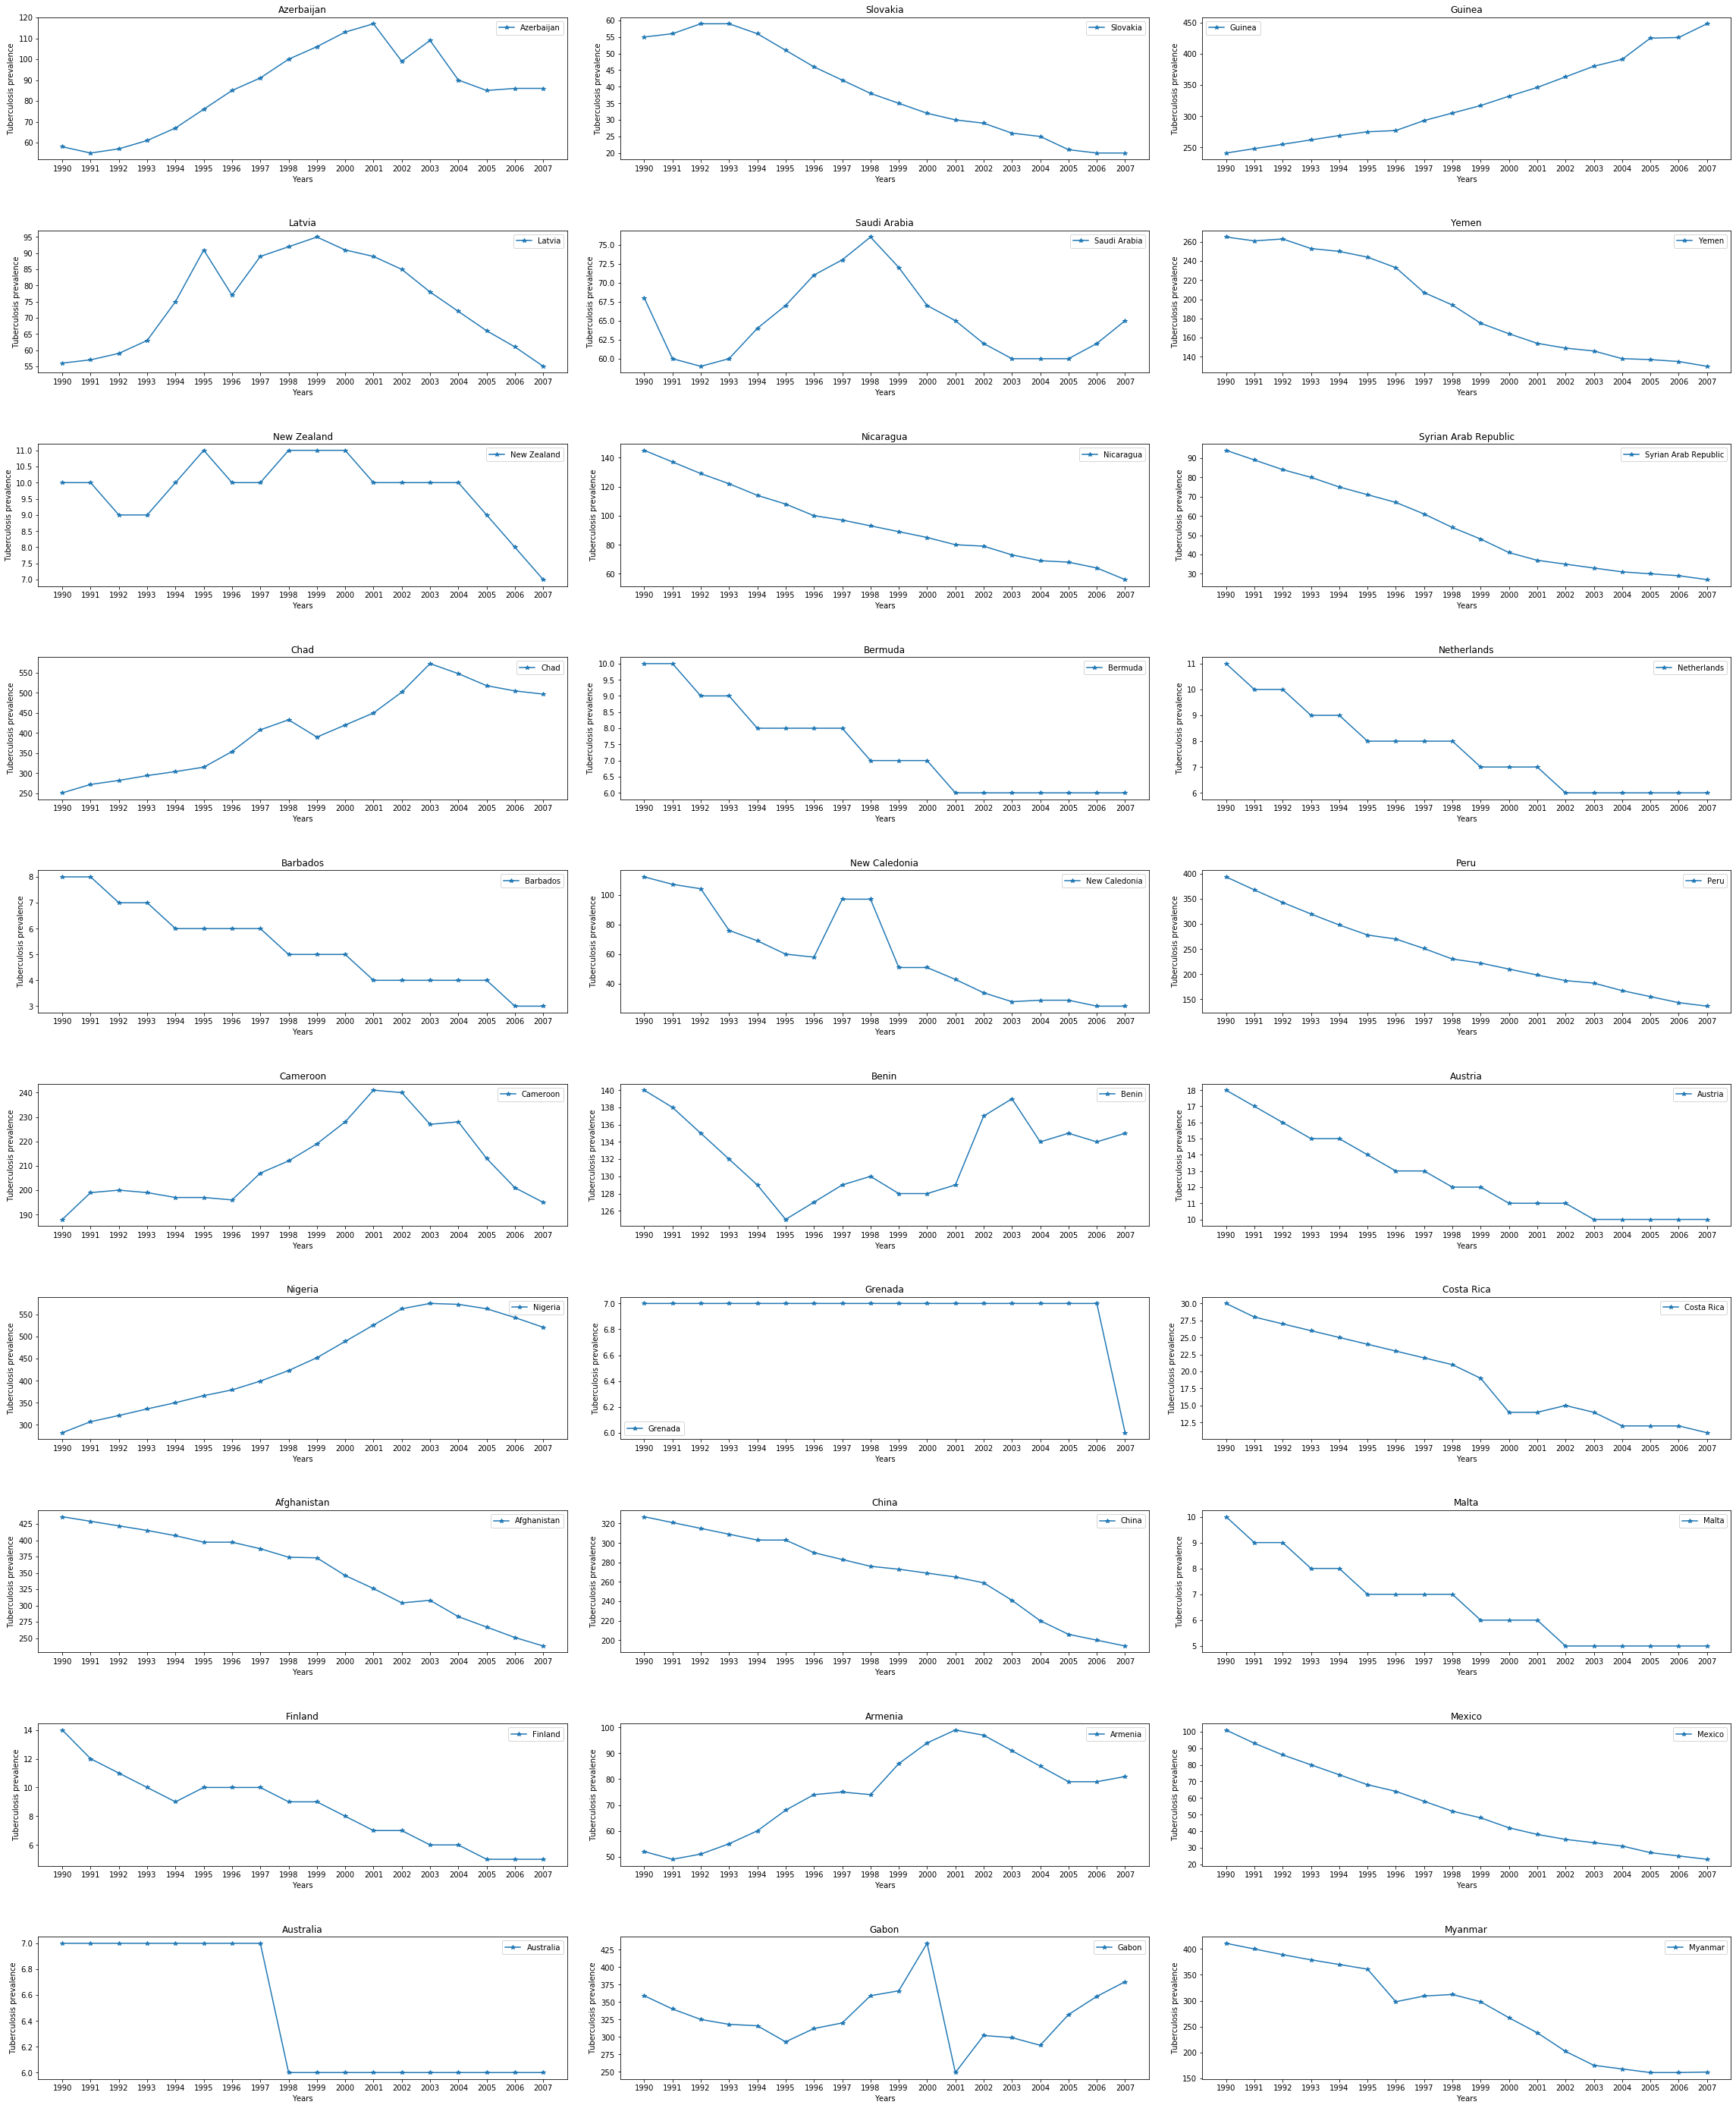

In [0]:
url = "https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv"
s = requests.get(url).content
ds = pd.read_csv(io.StringIO(s.decode('utf-8')),thousands=',')

def str_to_float(string):  
  for k in range(len(string)):
    string[k] = float(string[k])
  return string

column = ds.columns.values
x_axis = column[1:len(column)+1]
samples = ds.sample(30).values

result = [] # list to hold the random samples

for k in range(0,30):
  sample = samples[k]
  sample = sample[1:len(sample)+1]
  sample = str_to_float(sample) # string to float converting
  result.append(sample)

fig, axs = plt.subplots(10,3, figsize=(40, 50))
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for i in range(30):
    axs[i].plot(x_axis, result[i], label=samples[i][0], marker='*')
    axs[i].legend()
    axs[i].set_xlabel('Years')
    axs[i].set_ylabel('Tuberculosis prevalence')
    axs[i].set_title(samples[i][0])
plt.show()

### Question 2

1. Show the first 6 principle components plotted as a time series (in a 3 plots/row format).[1]  
2. Based on your knowledge of the dataset contents, can you explain what any of the principle components might represent?[0.5]

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = ds.iloc[:,1:].values # features
y = ds.iloc[:,0].values  # label
labels = set(y)

X_std = StandardScaler().fit_transform(X)
print(X[:, 0].mean(), X_std[:, 0].mean())
print(X[:, 0].var(), X_std[:, 0].var())

n, m = X_std.shape
print('Normalized data set, shape:', X_std.shape)
# Compute covariance matrix
C = np.cov(X_std.T)
print('Shape of covarianec matrix:',C.shape)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C)  # Compute the eigenvalues and eigenvectors for the covariance matrix
# One of the most intuitive explanations of eigenvectors of a covariance matrix is that they are the directions in which the data varies the most
print('EigenVector shape:',eigenVectors.shape)
print('\nEigenValues:', eigenValues, '\nNumber of eigenvalues: ', len(eigenValues))

args = (-eigenValues).argsort()  
eigenValues = eigenValues[args]
# print(eigenVectors.shape,'\n',eigenVectors)
eigenVectors = eigenVectors[:, args] # Each eignevector is a 18x1 matrix for the crossponding eigenvalue



196.96618357487924 -4.2907170033822474e-17
53741.93605451703 1.0
Normalized data set, shape: (207, 18)
Shape of covarianec matrix: (18, 18)
EigenVector shape: (18, 18)

EigenValues: [1.66475819e+01 1.03186740e+00 2.10620237e-01 4.58421105e-02
 4.15807075e-02 2.89335745e-02 2.21875244e-02 1.60749581e-02
 1.18475865e-02 8.63421209e-03 3.93623514e-04 7.48446088e-04
 1.25863621e-03 1.96297678e-03 2.61661418e-03 5.94710052e-03
 4.32033180e-03 4.96070162e-03] 
Number of eigenvalues:  18


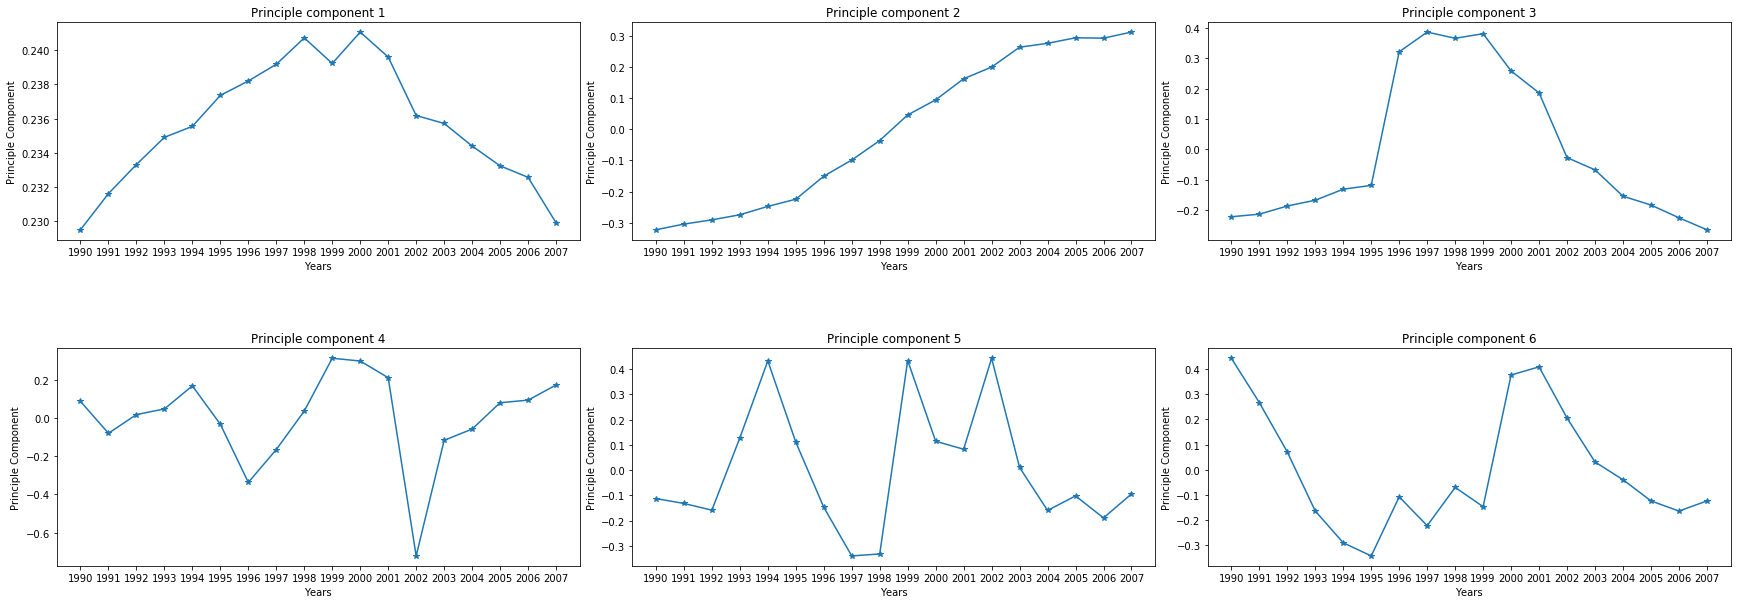

In [0]:
six_PC = eigenVectors[:,0:6]

fig, axs = plt.subplots(2,3, figsize=(30, 10))
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for i in range(6):
    axs[i].plot(x_axis, six_PC[:,i], marker='*')
    axs[i].set_xlabel('Years')
    axs[i].set_ylabel('Principle Component')
    axs[i].set_title('Principle component '+ str(i+1))
plt.show()

### Question 3

1. Pick an interesting data sample (ie, data from a single country) and display it.[1] 

2. Next, show its incremental reconstruction using the first 1-6 components (again plotted as a time series in a 3 plots/row format).[1]

3. In addition, show another plot with the residual error of each reconstruction compared to the original sample and a title that states the RMSE of the reconstruction for each of the 6 components.[1]

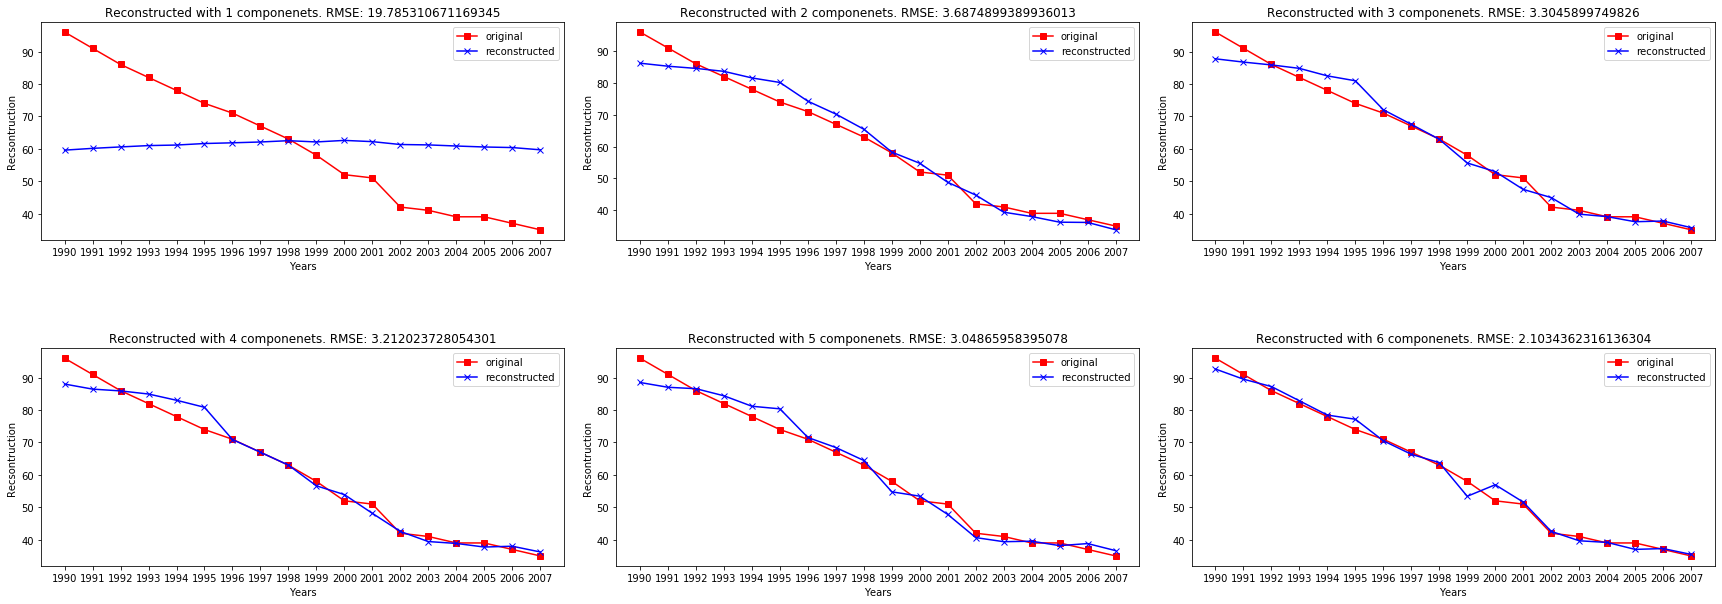

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

Argentina = ds.loc[[8]].values[0]
Argentina = Argentina[1:]
Argentina = str_to_float(Argentina)

Argentina_std = X_std[8,:] # get standardlized data 
projection = []
reconstruct = []
for k in range(1,7):
  W = eigenVectors[:, 0:k]
  projX = np.dot(Argentina, W) # forming new data set (dimension reduced to 2)
  projection.append(projX)
  recon = np.dot(W, projX)
  reconstruct.append(recon)

residual = []
RMSE = []
for i in range(6):
  residual.append(Argentina - reconstruct[i])
  k = sqrt(mean_squared_error(Argentina, reconstruct[i]))
  RMSE.append(k)

fig, axs = plt.subplots(2,3, figsize=(30, 10))
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for i in range(6):
    axs[i].plot(x_axis, Argentina, color='red', marker='s', label='original')
    axs[i].plot(x_axis, reconstruct[i], color='blue', marker='x', label='reconstructed')
    axs[i].set_xlabel('Years')
    axs[i].set_ylabel('Recsontruction')
    axs[i].set_title('Reconstructed with '+ str(i+1)+ ' componenets. RMSE: '+ str(RMSE[i]))
    axs[i].legend()
plt.show()


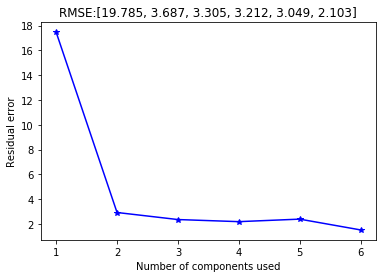

In [0]:
residual_mean = []
RMSE_round = []
for i in range (0,6):
  residual_mean.append(abs(residual[i]).mean())
  RMSE_round.append(round(RMSE[i],3))
x = np.arange(1,7)
plt.plot(x, residual_mean,color='blue', marker='*')
plt.xlabel('Number of components used')
plt.ylabel('Residual error')
plt.title('RMSE:'+ str(RMSE_round))
plt.show()

### Question 4

1. Plot the eigenvalues of the first 15 (or more) principle components and choose a number k of principle components that you believe will allow you to reconstruct the data well.[1]  


> I would choose 3 principle components to reconstruct the data.



2. How many did you choose and why?[1]


> From the plot of cumulative explained variance, 3 principle components can explain 98.9% variance of the original data set, thus, 3 principle components are good enough to reconstruct the original data set.



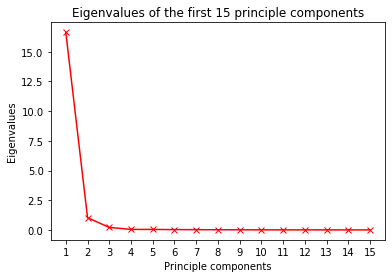

Cumulative explained variance: [ 92.03977111  97.74467407  98.90913378  99.16258184  99.39246981
  99.55243536  99.6751039   99.7639778   99.82947975  99.87721587
  99.91009571  99.93752202  99.96140791  99.97587443  99.98672718
  99.99368582  99.99782377 100.        ]


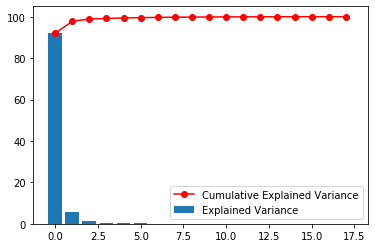

In [0]:
eigen15 = eigenValues[0:15]
n = np.arange(1,16) # x-axis
plt.plot(n, eigen15, color='red', marker='x')
plt.xlabel('Principle components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues of the first 15 principle components')
plt.xticks(n)
plt.show()

eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues] # explained variance
cumExpVar = np.cumsum(expVar) # Return the cumulative sum of the elements along a given axis
print('Cumulative explained variance:',cumExpVar)

plt.bar(range(18), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

### Question 5

1. Compute the mean (M) and standard deviation (StD) of the interesting data sample selected in question 3.[0.5]

Random walk refers to any process in which there is no observable pattern or trend; that is, where the movements of an object, or the values taken by a certain variable, are completely random. Each "step" taken in a random walk can be sampled from a distribution. You may find the methods numpy.random.normal, numpy.cumsum useful for creating random walks. 

2. Make 6 time series of random walks of the same length as the time series in this dataset. Random walks created should have the same mean M and standard deviation StD as the data sample choosen. Each next step in the random walk is some Uniform or Gaussian perturbation from the previous sample.[1]
    - Show for a sample random walk it's mean and standard deviation matches M and StD respectively.
    - Visualize these 6 time series in a 2 x 3 plot.


3. Show the reconstruction of each time series using k principle components overlayed on the original random walk. Plot this in a 2 x 3 plot and report the RMSE of the reconstruction in the title of each plot.[1]
4. Compare these RMSE values with the ones you got for question 3.[1]
> The RMSE values from the two datsset are really close.

Mean:  61.22222222222222 
Standard deviation:  20.223748416156685

Random Walks
Mean:  647.5525126834792 Std:  348.017947978977
Standardlized Mean:  -3.0839528461809903e-16 Std:  0.9999999999999999
Rescaled Mean:  61.22222222222222 Std:  20.223748416156685 

Mean:  675.9995818465873 Std:  371.7159082979146
Standardlized Mean:  -2.9605947323337506e-16 Std:  1.0
Rescaled Mean:  61.22222222222221 Std:  20.223748416156685 

Mean:  593.4432960747965 Std:  336.70031027284585
Standardlized Mean:  -1.7270135938613546e-16 Std:  1.0
Rescaled Mean:  61.22222222222222 Std:  20.22374841615669 

Mean:  573.7029142822702 Std:  347.4525212725256
Standardlized Mean:  2.590520390792032e-16 Std:  1.0000000000000002
Rescaled Mean:  61.22222222222222 Std:  20.22374841615669 

Mean:  549.9433465049649 Std:  296.6564784162206
Standardlized Mean:  2.0970879354030734e-16 Std:  0.9999999999999998
Rescaled Mean:  61.22222222222222 Std:  20.22374841615668 

Mean:  557.5409436096693 Std:  322.0763709961285
Standar

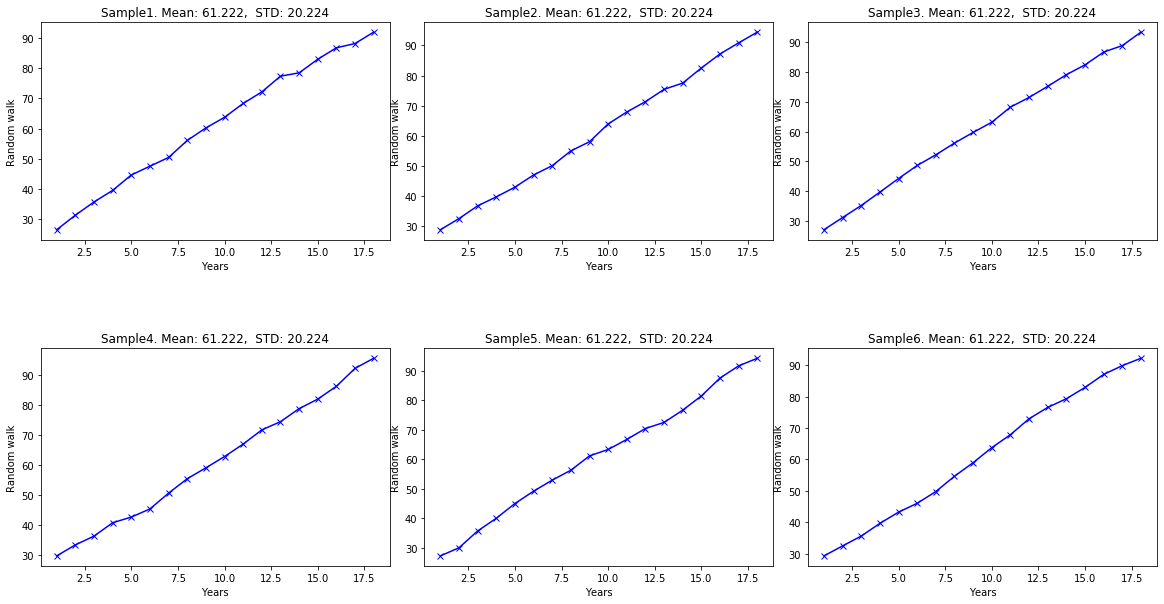

In [0]:
import statistics
from sklearn.preprocessing import StandardScaler

sample = X[8]
sample_std = X_std
mean = sample.mean()
std = statistics.stdev(sample)
print('Mean: ', mean, '\nStandard deviation: ', std)

step_num = len(sample)
walks = []
original = []

print('\nRandom Walks')
for k in range (6):
  step = np.random.normal(loc=mean, scale=std, size=18)
  original.append(step)
  step = np.cumsum(step)
  step = np.reshape(step, (-1, 1))
  print('Mean: ', step.mean(), 'Std: ', np.std(step))
  step_std = StandardScaler().fit_transform(step)
  print('Standardlized Mean: ', step_std.mean(), 'Std: ', np.std(step_std))
  step_std = step_std*std + mean # rescale the generate data set
  print('Rescaled Mean: ', step_std.mean(), 'Std: ', np.std(step_std),'\n')
  walks.append(step_std)

x = np.arange(1,19)
fig, axs = plt.subplots(2,3, figsize=(20, 10))
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for i in range(6):
    axs[i].plot(x, walks[i], color='blue', marker='x')
    axs[i].set_xlabel('Years')
    axs[i].set_ylabel('Random walk')
    axs[i].set_title('Sample' +str(i+1) + '. Mean: '+ str(round((walks[i]).mean(),3))+ ',  STD: '+ str(round(np.std(walks[i]), 3)))
plt.show()



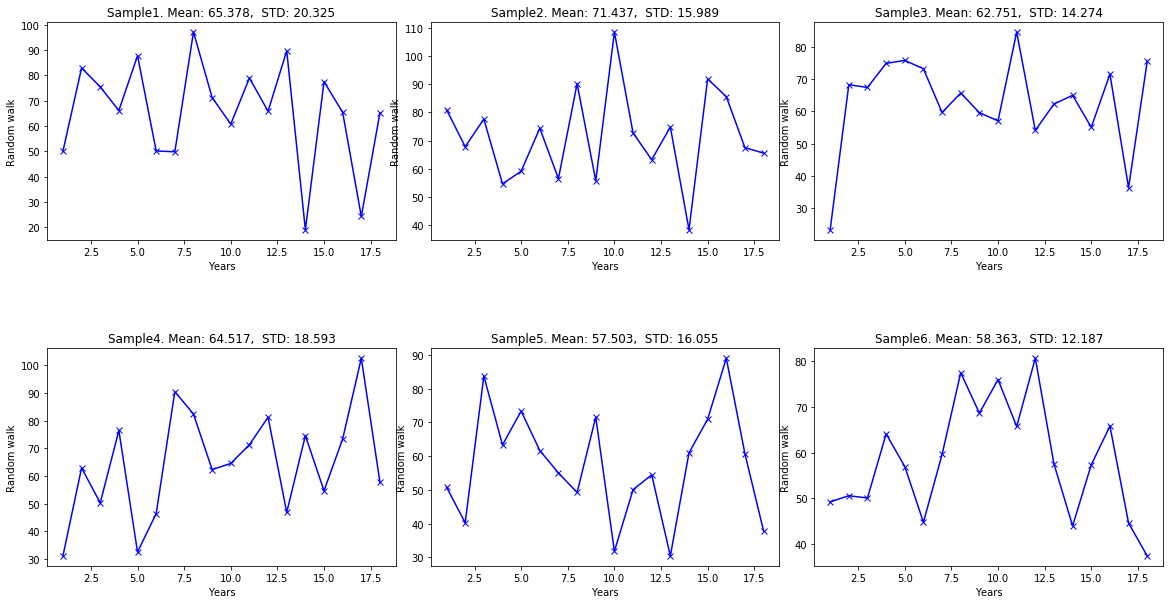

In [0]:
x = np.arange(1,19)
fig, axs = plt.subplots(2,3, figsize=(20, 10))
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for i in range(6):
    axs[i].plot(x, original[i], color='blue', marker='x')
    axs[i].set_xlabel('Years')
    axs[i].set_ylabel('Random walk')
    axs[i].set_title('Sample' +str(i+1) + '. Mean: '+ str(round((original[i]).mean(),3))+ ',  STD: '+ str(round(np.std(original[i]), 3)))
plt.show()

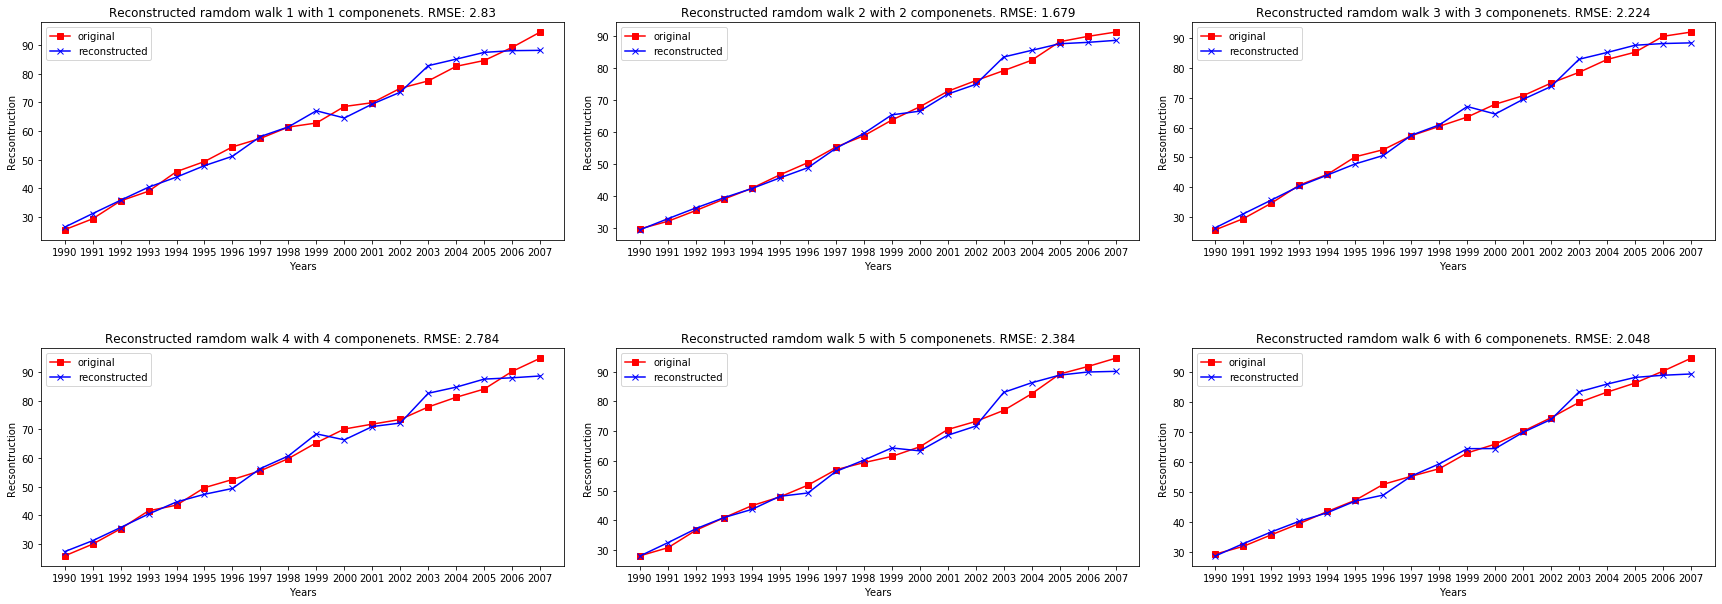

RMSE in question 3, reconstructed with 6 components 2.1034362316136304
RMSE in question 5, reconstructed with 6 components 2.829600229629742 

RMSE in question 3, reconstructed with 6 components 2.1034362316136304
RMSE in question 5, reconstructed with 6 components 1.6790813805988656 

RMSE in question 3, reconstructed with 6 components 2.1034362316136304
RMSE in question 5, reconstructed with 6 components 2.2239883632806037 

RMSE in question 3, reconstructed with 6 components 2.1034362316136304
RMSE in question 5, reconstructed with 6 components 2.7841705083232253 

RMSE in question 3, reconstructed with 6 components 2.1034362316136304
RMSE in question 5, reconstructed with 6 components 2.38370582100121 

RMSE in question 3, reconstructed with 6 components 2.1034362316136304
RMSE in question 5, reconstructed with 6 components 2.0482381317960128 



In [0]:
sample_projection = []
sample_reconstruct = []

for i in range(0,6):
  W = eigenVectors[:, 0:6]
  walks[i] = np.reshape(walks[i], (1,-1))
  projS = np.dot(walks[i], W) # forming new data set (dimension reduced to 2)
  sample_projection.append(projS)
  projS = np.reshape(projS, (-1,1))
  recon = np.dot(W, projS)
  sample_reconstruct.append(recon)

sample_residual = []
sample_RMSE = []
for i in range(6):
  walks[i] = np.reshape(walks[i], (-1,1))
  sample_residual.append(walks[i] - sample_reconstruct[i])
  k = sqrt(mean_squared_error(walks[i], sample_reconstruct[i]))
  sample_RMSE.append(k)

fig, axs = plt.subplots(2,3, figsize=(30, 10))
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()

for i in range(6):
    axs[i].plot(x_axis, walks[i], color='red', marker='s', label='original')
    axs[i].plot(x_axis, sample_reconstruct[i], color='blue', marker='x', label='reconstructed')
    axs[i].set_xlabel('Years')
    axs[i].set_ylabel('Recsontruction')
    axs[i].set_title('Reconstructed ramdom walk ' + str(i+1) + ' with ' + str(i+1) + ' componenets. RMSE: '+ str(round(sample_RMSE[i], 3)))
    axs[i].legend()
plt.show()

# compare RMSE with Q3
for i in range(6):
  print('RMSE in question 3, reconstructed with 6 components' ,RMSE[5])
  print('RMSE in question 5, reconstructed with 6 components' ,sample_RMSE[i],'\n')


### Question 6

Explain how could you use PCA to do anomaly detection.[1]

> PCA may be used to reduce your number of features, but it doesn't have to. You will have as many PC's as the number of original features, only that some of them will account for very few of the total variability. That can be visualized in a scree or pareto plot, where the accumulated variance reaches 100% with the last PC. Therefore, you should not be missing any information by using PCA. There is some discussion about this in [Do components of PCA really represent percentage of variance? Can they sum to more than 100%? But then, two contraditory points emerge here:

1.  If no reduction in dimensionality is achieved when retaining all PCs, that is if you are care about all the anomalies present in your dataset, and your first goal was to have less features to work with (which will make you lose some information), why use PCA?

2.  PCA is generally used when the interest is the "main modes of variability" of your dataset: the first couple of PC's, generally. Small anomalies, as I believe is the case of the ones you pointed out, are expexted to be ignored once only the main components are retained when you consider only the firts PC's for dimensionality reduction.


3.  The "size" or frequency of the anomalies of one feature are not important by themselves, but you should compare them to the the others in order to know wether they will disappear when you reduce dimensionality. Say, if the variability of this specific anomaly is (quasi-)orthogonal to the first PC's (the ones you use), then you will lose this information. If you are lucky that the mode of variability of the anomalies you are interested in is similar to the main modes of the variability of your entire dataset, then this iformation is kept in the first PC's. 



## References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Eigenfaces:
1. Snippets from: https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb
2. https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

Author: Parth Jaggi